In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

# Analysis of Kong et al., _Immunity_, 2023

https://singlecell.broadinstitute.org/single_cell/study/SCP1884/human-cd-atlas-study-between-colon-and-terminal-ileum

We're interested in Stromal compartments.

## 1. Colon Stromal cells

Load data

In [3]:
cache = 'kong-2023/CO_STR.h5ad'
if not os.path.exists(cache):
    co = sc.read_mtx('kong-2023/CO_STR.scp.matrix.mtx')
    co_vars = pd.read_table('kong-2023/CO_STR.scp.features.tsv', header=None)
    co_cells = pd.read_table('kong-2023/CO_STR.scp.barcodes.tsv', header=None)

    # Create `AnnData` object
    co = co.T
    co.var_names = co_vars[1]
    co.obs_names = co_cells[0]

    # Add metadata
    meta = pd.read_table('kong-2023/scp_metadata_combined.v2.txt', skiprows=[1], index_col=0)
    co.obs = meta.loc[co.obs_names]

    # Add UMAP coordinates
    co_umap = pd.read_table('kong-2023/CO_STR.scp.X_umap.coords.txt', skiprows=[1], index_col=0)
    co.obsm['X_umap'] = co_umap.to_numpy()
    
    co.obs.donor_id = co.obs.donor_id.astype(str)
    co.write_h5ad(cache)
else:
    co = sc.read_h5ad(cache)

Keep only Fibroblasts

In [4]:
co.obs.Celltype.unique().tolist()

['Fibroblasts ADAMDEC1',
 'Endothelial cells CD36',
 'Fibroblasts KCNN3 LY6H',
 'Lymphatics',
 'Endothelial cells LTC4S SEMA3G',
 'Endothelial cells DARC',
 'Pericytes HIGD1B STEAP4',
 'Glial cells',
 'Myofibroblasts HHIP NPNT',
 'Stromal Cycling cells',
 'Inflammatory fibroblasts IL11 CHI3L1',
 'Fibroblasts NPY SLITRK6',
 'Fibroblasts SFRP2 SLPI',
 'Fibroblasts SMOC2 PTGIS',
 'Pericytes RERGL NTRK2',
 'Activated fibroblasts CCL19 ADAMADEC1',
 'Myofibroblasts GREM1 GREM2']

In [5]:
fibs = [
    'Fibroblasts ADAMDEC1',
    'Fibroblasts KCNN3 LY6H',
    'Fibroblasts NPY SLITRK6',
    'Fibroblasts SFRP2 SLPI',
    'Fibroblasts SMOC2 PTGIS',
    'Activated fibroblasts CCL19 ADAMADEC1',
    'Inflammatory fibroblasts IL11 CHI3L1',
    'Myofibroblasts GREM1 GREM2',
    'Myofibroblasts HHIP NPNT',
]

In [6]:
co_fibs = co[co.obs.Celltype.isin(fibs), :].copy()

Plot genes by sample `Type`

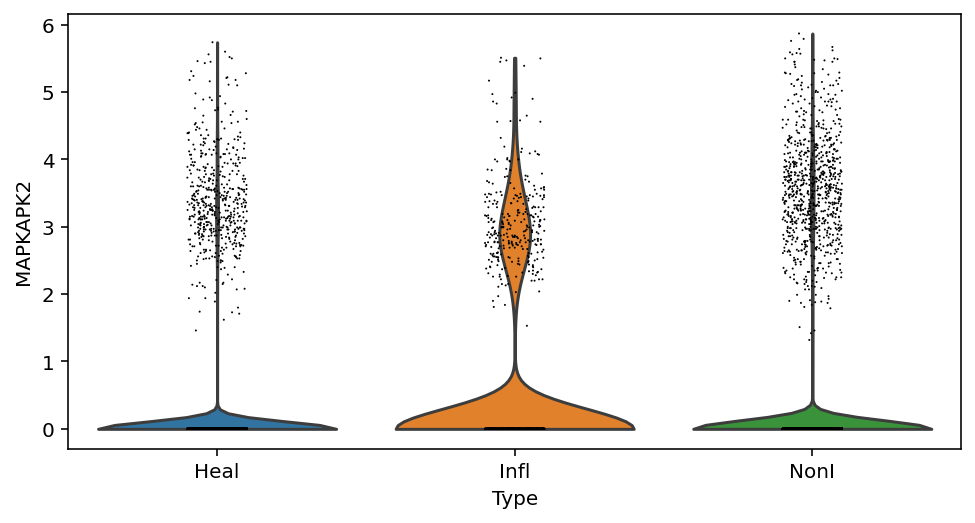

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.violin(co_fibs, keys=['MAPKAPK2'], groupby='Type', ax=ax)

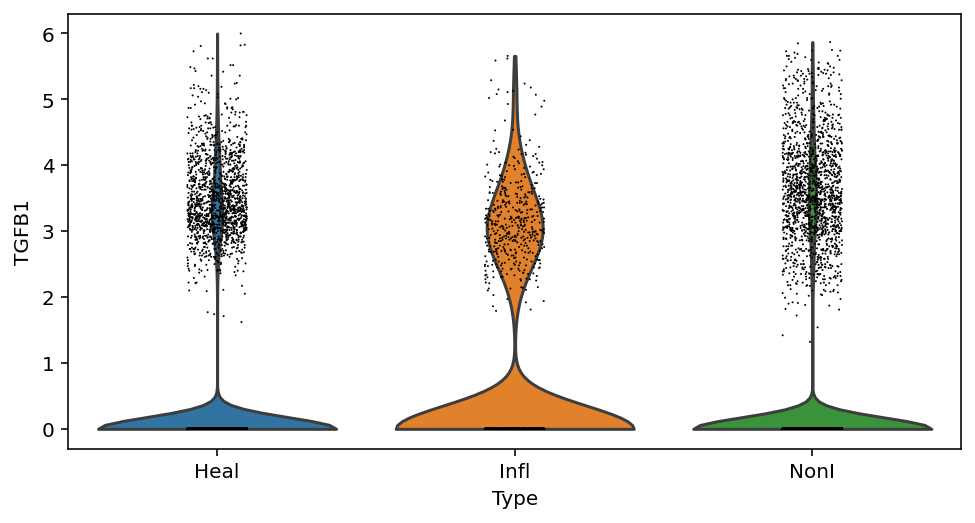

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.violin(co_fibs, keys=['TGFB1'], groupby='Type', ax=ax)

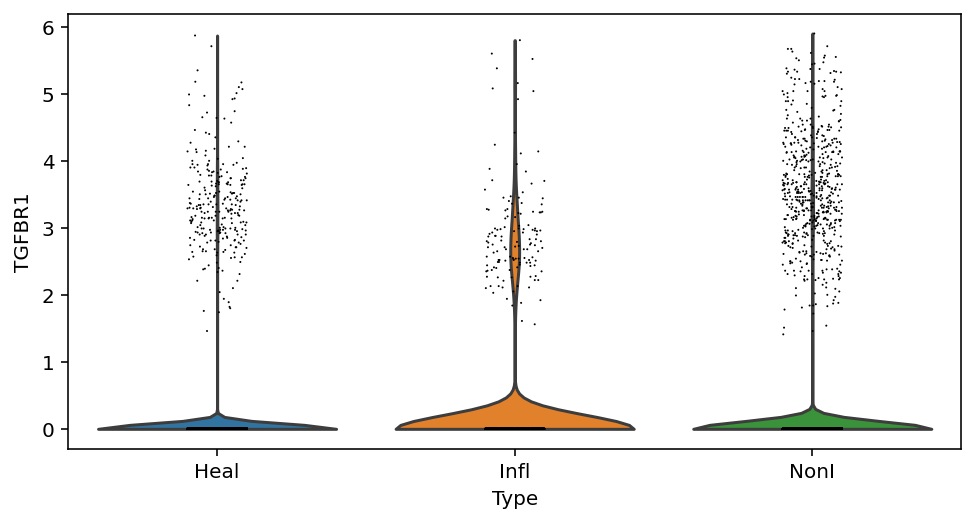

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.violin(co_fibs, keys=['TGFBR1'], groupby='Type', ax=ax)

/tmp/ipykernel_225360/1984222214.py:39: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig('kong-2023/colon.pdf', dpi=200)
/projects/b1038/Pulmonary/nmarkov/2022-script-atlas/code/venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/projects/b1038/Pulmonary/nmarkov/2022-script-atlas/code/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


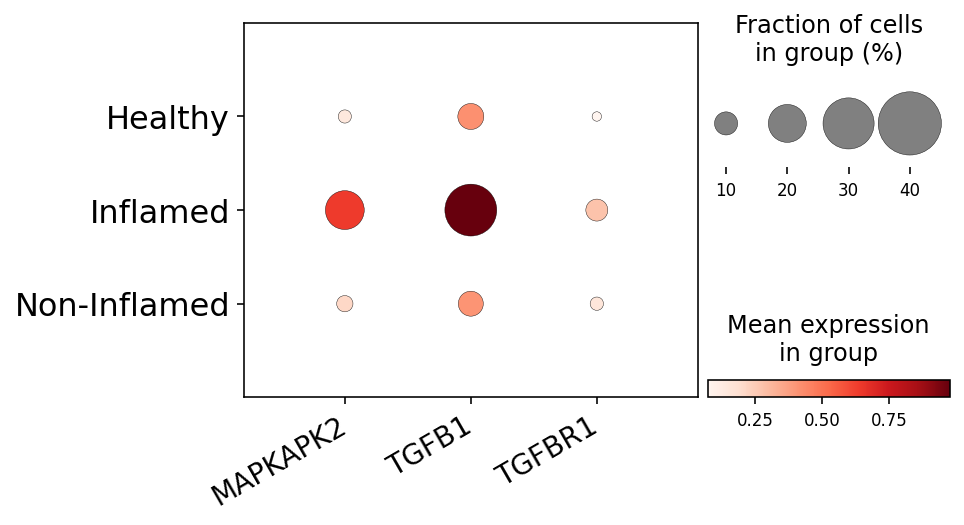

In [94]:
fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
plot = sc.pl.dotplot(
    co_fibs,
    var_names=['MAPKAPK2', 'TGFB1', 'TGFBR1'],
    groupby='Type',
    ax=ax,
    show=False,
    return_fig=True,
)
plot.style(cmap='Reds', smallest_dot=10, largest_dot=1000)
plot = plot.show(return_axes=True)
plot['mainplot_ax'].set_yticklabels(['Healthy', 'Inflamed', 'Non-Inflamed'], size=16)
plot['mainplot_ax'].tick_params(axis='x', labelsize=14)
nudge = mpl.transforms.Affine2D().translate(6, 0)
for t in plot['mainplot_ax'].get_xticklabels():
    t.set_rotation(30)
    t.set_ha('right')
    t.set_transform(t.get_transform() + nudge)
p = plot['mainplot_ax'].get_position()
p.x0 = 0.25
p.x1 = 0.7
p.y0 = 0.25
p.y1 = 0.9
plot['mainplot_ax'].set_position(p)
p = plot['size_legend_ax'].get_position()
p.x0 = 0.71
p.x1 = 0.95
p.y0 = 0.65
p.y1 = 0.8
plot['size_legend_ax'].set_position(p)
plot['size_legend_ax'].set_title(plot['size_legend_ax'].get_title(), pad=10)
p = plot['color_legend_ax'].get_position()
p.x0 = 0.71
p.x1 = 0.95
p.y0 = 0.25
p.y1 = 0.28
plot['color_legend_ax'].set_position(p)
plot['color_legend_ax'].set_title(plot['color_legend_ax'].get_title(), pad=10)
fig.savefig('kong-2023/colon.pdf', dpi=200)

In [58]:
plot['size_legend_ax'].get_title()

'Fraction of cells\nin group (%)'

In [49]:
plot

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

In [50]:
p

Bbox([[0.5072635135135135, 0.44013043478260866], [0.9, 0.6173913043478261]])

In [97]:
co_fibs.obs.Type.value_counts()

NonI    14496
Heal    12430
Infl     1486
Name: Type, dtype: int64

## 2. Ileum Stromal cells

Load data

In [96]:
cache = 'kong-2023/TI_STR.h5ad'
if not os.path.exists(cache):
    ti = sc.read_mtx('kong-2023/TI_STR.scp.matrix.mtx')
    ti_vars = pd.read_table('kong-2023/TI_STR.scp.features.tsv', header=None)
    ti_cells = pd.read_table('kong-2023/TI_STR.scp.barcodes.tsv', header=None)

    # Create `AnnData` object
    ti = ti.T
    ti.var_names = ti_vars[1]
    ti.obs_names = ti_cells[0]

    # Add metadata
    meta = pd.read_table('kong-2023/scp_metadata_combined.v2.txt', skiprows=[1], index_col=0)
    ti.obs = meta.loc[ti.obs_names]

    # Add UMAP coordinates
    ti_umap = pd.read_table('kong-2023/TI_STR.scp.X_umap.coords.txt', skiprows=[1], index_col=0)
    ti.obsm['X_umap'] = ti_umap.to_numpy()
    
    ti.obs.donor_id = ti.obs.donor_id.astype(str)
    ti.write_h5ad(cache)
else:
    ti = sc.read_h5ad(cache)

/tmp/ipykernel_225360/540426870.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_table('kong-2023/scp_metadata_combined.v2.txt', skiprows=[1], index_col=0)


Keep only Fibroblasts

In [98]:
ti.obs.Celltype.unique().tolist()

['Fibroblasts ADAMDEC1',
 'Endothelial cells CD36',
 'Myofibroblasts HHIP NPNT',
 'Fibroblasts SMOC2 PTGIS',
 'Endothelial cells DARC',
 'Fibroblasts NPY SLITRK6',
 'Myofibroblasts GREM1 GREM2',
 'Endothelial cells CA4 CD36',
 'Glial cells',
 'Fibroblasts SFRP2 SLPI',
 'Endothelial cells LTC4S SEMA3G',
 'Pericytes HIGD1B STEAP4',
 'Activated fibroblasts CCL19 ADAMADEC1',
 'Lymphatics',
 'Fibroblasts KCNN3 LY6H',
 'Pericytes RERGL NTRK2']

In [99]:
ti_fibs = ti[ti.obs.Celltype.isin(fibs), :].copy()

Plot genes by sample `Type`

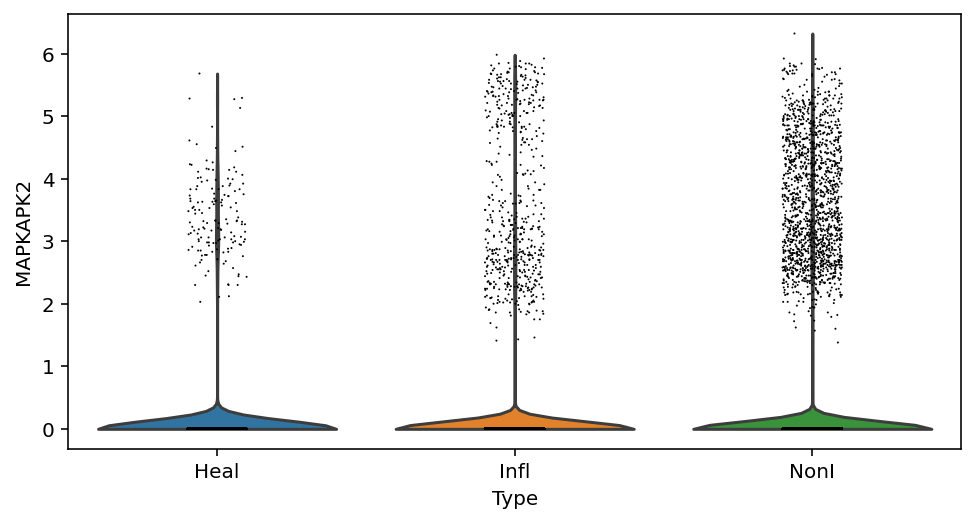

In [100]:
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.violin(ti_fibs, keys=['MAPKAPK2'], groupby='Type', ax=ax)

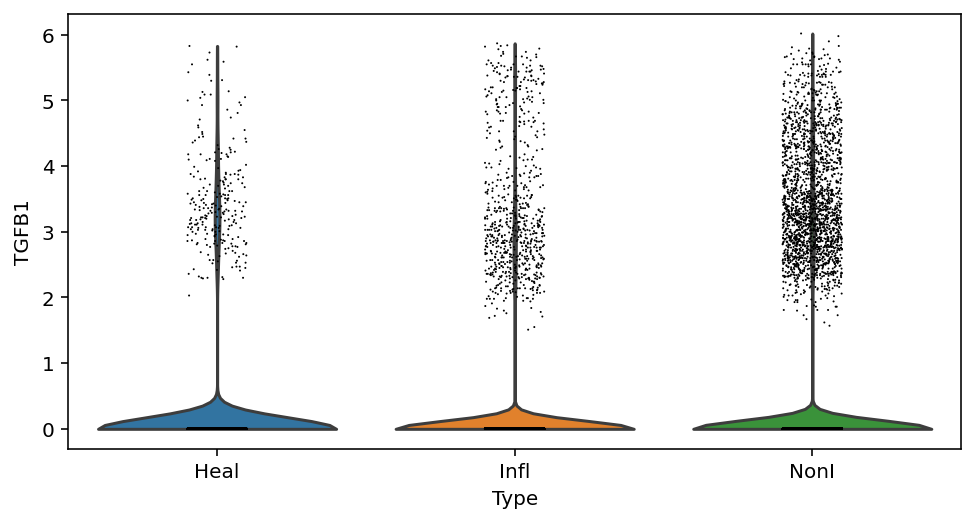

In [101]:
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.violin(ti_fibs, keys=['TGFB1'], groupby='Type', ax=ax)

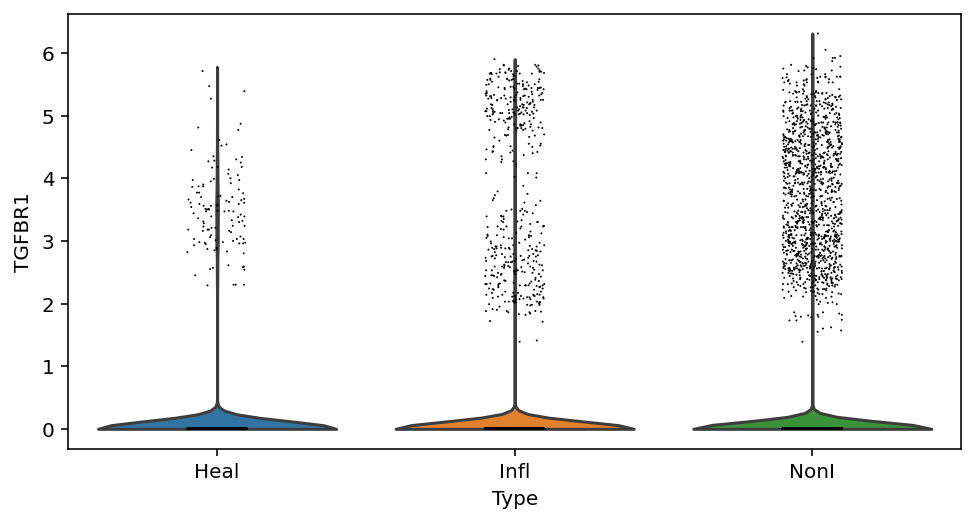

In [102]:
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.violin(ti_fibs, keys=['TGFBR1'], groupby='Type', ax=ax)

/tmp/ipykernel_225360/3839854379.py:39: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig('kong-2023/ileum.pdf', dpi=200)
/projects/b1038/Pulmonary/nmarkov/2022-script-atlas/code/venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/projects/b1038/Pulmonary/nmarkov/2022-script-atlas/code/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


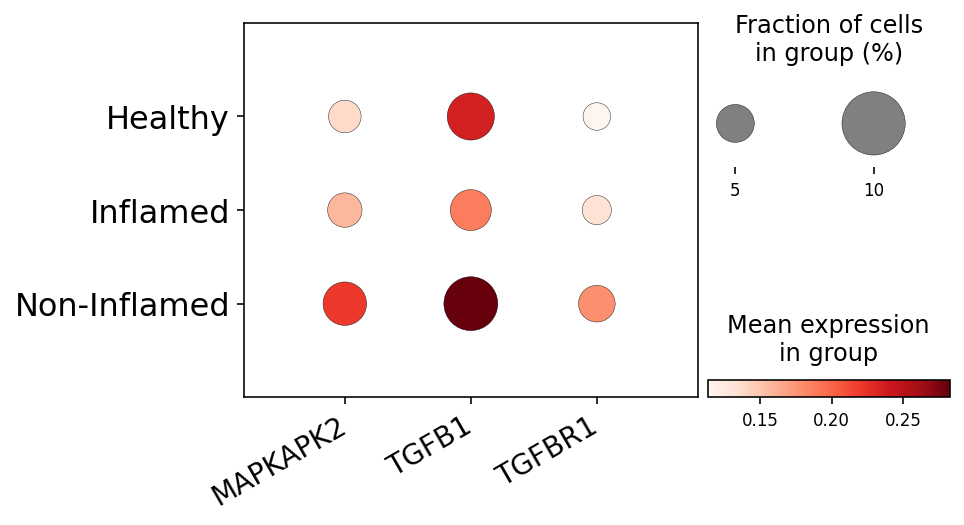

In [104]:
fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
plot = sc.pl.dotplot(
    ti_fibs,
    var_names=['MAPKAPK2', 'TGFB1', 'TGFBR1'],
    groupby='Type',
    ax=ax,
    show=False,
    return_fig=True,
)
plot.style(cmap='Reds', smallest_dot=10, largest_dot=1000)
plot = plot.show(return_axes=True)
plot['mainplot_ax'].set_yticklabels(['Healthy', 'Inflamed', 'Non-Inflamed'], size=16)
plot['mainplot_ax'].tick_params(axis='x', labelsize=14)
nudge = mpl.transforms.Affine2D().translate(6, 0)
for t in plot['mainplot_ax'].get_xticklabels():
    t.set_rotation(30)
    t.set_ha('right')
    t.set_transform(t.get_transform() + nudge)
p = plot['mainplot_ax'].get_position()
p.x0 = 0.25
p.x1 = 0.7
p.y0 = 0.25
p.y1 = 0.9
plot['mainplot_ax'].set_position(p)
p = plot['size_legend_ax'].get_position()
p.x0 = 0.71
p.x1 = 0.95
p.y0 = 0.65
p.y1 = 0.8
plot['size_legend_ax'].set_position(p)
plot['size_legend_ax'].set_title(plot['size_legend_ax'].get_title(), pad=10)
p = plot['color_legend_ax'].get_position()
p.x0 = 0.71
p.x1 = 0.95
p.y0 = 0.25
p.y1 = 0.28
plot['color_legend_ax'].set_position(p)
plot['color_legend_ax'].set_title(plot['color_legend_ax'].get_title(), pad=10)
fig.savefig('kong-2023/ileum.pdf', dpi=200)

In [103]:
ti_fibs.obs.Type.value_counts()

NonI    26109
Infl    12752
Heal     3778
Name: Type, dtype: int64